In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Set 준비

In [2]:
train_data = pd.read_csv('train_set.csv', index_col = 0)
test_data = pd.read_csv('test_set.csv', index_col = 0)

In [3]:
train_data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35
1,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32
2,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78
3,2021-01-06,1942.60,1012.55,4420.99,1484.83,2555.18,3440.97,11108.13
4,2021-01-07,1872.97,694.47,4080.54,1488.01,2740.90,3018.87,11615.35
...,...,...,...,...,...,...,...,...
1241,2024-12-26,2548.80,1332.04,5217.14,1161.23,1487.55,11351.61,11099.88
1242,2024-12-27,3642.66,1545.93,4674.20,1200.78,1503.53,10328.21,11454.85
1243,2024-12-28,2941.62,1325.48,4317.21,1292.75,1396.15,12691.50,11325.36
1244,2024-12-30,2287.54,2270.71,4904.38,1167.73,1566.44,10164.39,11842.47


In [4]:
test_data

,date,cabbage,radish,garlic,onion,daikon,cilantror,artichoke
0,2025-01-02,5078.12,3229.76,9820.4,2056.0,3559.40,36314.89,29710.0
1,2025-01-03,5026.88,3205.71,9579.2,2046.4,3509.00,35636.17,29818.0
2,2025-01-06,5211.25,3330.00,9958.0,2029.2,3495.00,35021.28,29850.0
3,2025-01-07,5318.33,3400.73,9794.0,2030.8,3508.20,34848.94,29754.0
4,2025-01-08,5366.88,3415.12,9797.2,2026.8,3493.00,34891.49,29706.0
...,...,...,...,...,...,...,...,...
75,2025-04-24,5035.83,2958.18,10985.6,3168.6,2036.80,25229.79,28246.0
76,2025-04-25,5011.46,3008.48,11102.0,3212.8,2026.40,25034.04,28766.0
77,2025-04-28,4983.54,2949.39,11490.8,3162.4,2037.80,24889.36,28818.0
78,2025-04-29,4954.38,2931.52,11536.2,3143.6,2054.80,24710.64,28664.0


## EDA 진행

In [5]:
print(train_data.info())
print('=' * 50)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1246 non-null   object 
 1   cabbage    1240 non-null   float64
 2   radish     1241 non-null   float64
 3   garlic     1239 non-null   float64
 4   onion      1239 non-null   float64
 5   daikon     1244 non-null   float64
 6   cilantro   1236 non-null   float64
 7   artichoke  1239 non-null   float64
dtypes: float64(7), object(1)
memory usage: 87.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       80 non-null     object 
 1   cabbage    80 non-null     float64
 2   radish     80 non-null     float64
 3   garlic     80 non-null     float64
 4   onion      78 non-null     float64
 5   daikon     80 non-null     float64
 6   cilantror  80 non-n

In [6]:
print(train_data.isnull().sum())
print('=' * 50)
print(test_data.isnull().sum())

date          0
cabbage       6
radish        5
garlic        7
onion         7
daikon        2
cilantro     10
artichoke     7
dtype: int64
date         0
cabbage      0
radish       0
garlic       0
onion        2
daikon       0
cilantror    0
artichoke    0
dtype: int64


- Nan 값이 존재. 해당 값들을 해당 월의 평균 값으로 대체

In [7]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['year_month'] = train_data['date'].dt.to_period('M')

test_data['date'] = pd.to_datetime(test_data['date'])
test_data['year_month'] = test_data['date'].dt.to_period('M')

rows = train_data.isna().any(axis=1)
print(train_data[rows].head())

          date  cabbage  radish   garlic   onion   daikon  cilantro  \
31  2021-02-07   553.20  356.68      NaN  1030.0  3772.44       NaN   
223 2021-09-20  2985.97  576.81  6959.62     NaN  1441.37   1706.55   
336 2022-02-03  1668.21  435.42  6796.20   450.0  1904.38       NaN   
411 2022-05-01      NaN     NaN  8100.00     NaN      NaN       NaN   
424 2022-05-15      NaN     NaN  5440.00     NaN      NaN       NaN   

     artichoke year_month  
31     7213.89    2021-02  
223    5121.82    2021-09  
336   11550.61    2022-02  
411        NaN    2022-05  
424        NaN    2022-05  


In [8]:
# test 데이터 속 cilantror != cilantro
test_data.columns = train_data.columns

features = train_data.drop(columns=['date','year_month']).columns

for feature in features:
    #------------train data--------------
    train_avg_month = train_data.groupby('year_month')[feature].mean().round(2)
    train_rows_NaN_feature = train_data[train_data[feature].isna()].index
    
    for idx in train_rows_NaN_feature:
        year_month = train_data.at[idx, 'year_month']
        if pd.notna(train_avg_month.get(year_month)):  
            train_data.at[idx, feature] = train_avg_month[year_month]
            
    #------------test data--------------
    test_avg_month = test_data.groupby('year_month')[feature].mean().round(2)
    test_rows_NaN_feature = test_data[test_data[feature].isna()].index
    
    for idx in test_rows_NaN_feature:
        year_month = test_data.at[idx, 'year_month']
        if pd.notna(test_avg_month.get(year_month)):  
            test_data.at[idx, feature] = test_avg_month[year_month]
   

In [9]:
print(train_data[rows].head())

          date  cabbage  radish   garlic    onion   daikon  cilantro  \
31  2021-02-07   553.20  356.68  4415.75  1030.00  3772.44   4243.76   
223 2021-09-20  2985.97  576.81  6959.62   893.28  1441.37   1706.55   
336 2022-02-03  1668.21  435.42  6796.20   450.00  1904.38   4907.77   
411 2022-05-01  2429.81  918.75  8100.00   635.36  1295.08   5041.66   
424 2022-05-15  2429.81  918.75  5440.00   635.36  1295.08   5041.66   

     artichoke year_month  
31     7213.89    2021-02  
223    5121.82    2021-09  
336   11550.61    2022-02  
411    6634.13    2022-05  
424    6634.13    2022-05  


In [10]:
train_data.drop(columns='year_month', inplace=True)
test_data.drop(columns='year_month', inplace=True)

In [11]:
print(train_data.isnull().sum())
print('=' * 50)
print(test_data.isnull().sum())

date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64
date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64


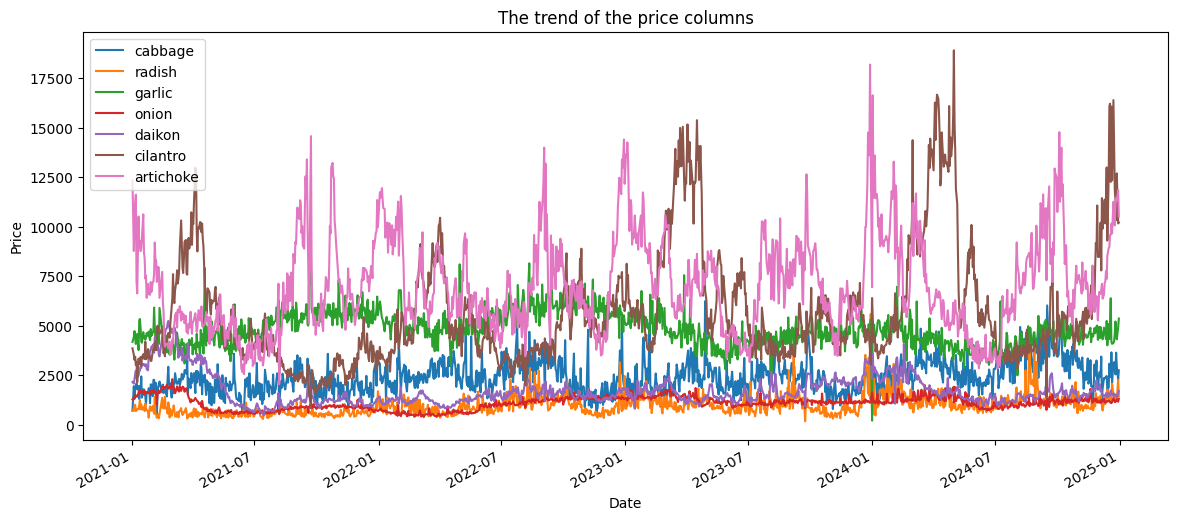

In [12]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

train_data.set_index('date').plot(figsize = (14, 6))

plt.title("The trend of the price columns")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [13]:
def calculate_rolling_mean(data, window = 7):
    data_rolling_mean = data.drop(columns = ['date']).rolling(window = window, min_periods = 1).mean()

    data_rolling_mean['date'] = data['date']

    return data_rolling_mean

train_data_roll = calculate_rolling_mean(train_data)

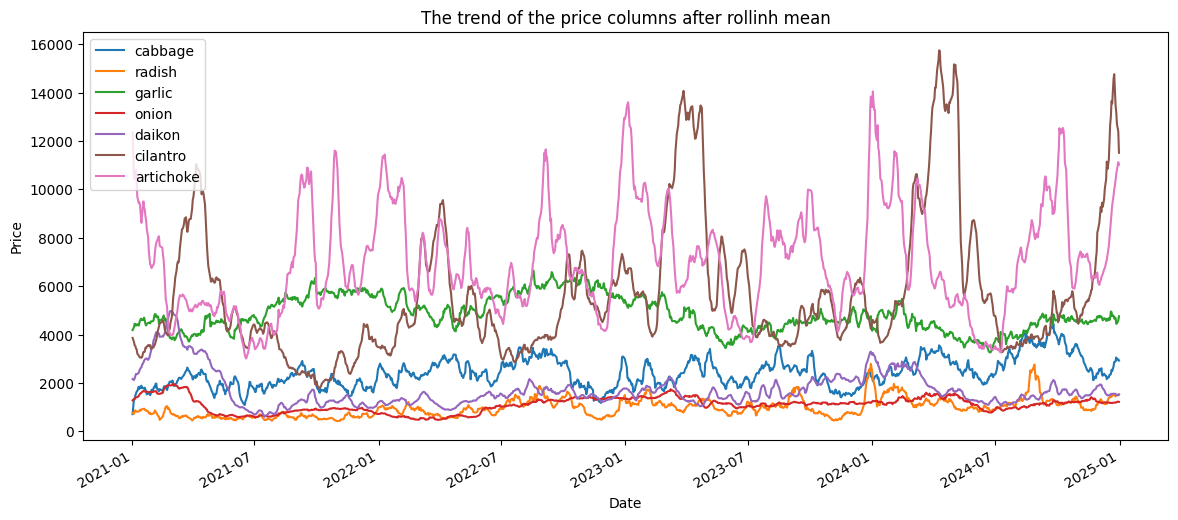

In [14]:
train_data_roll.set_index('date').plot(figsize = (14, 6))

plt.title("The trend of the price columns after rollinh mean")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

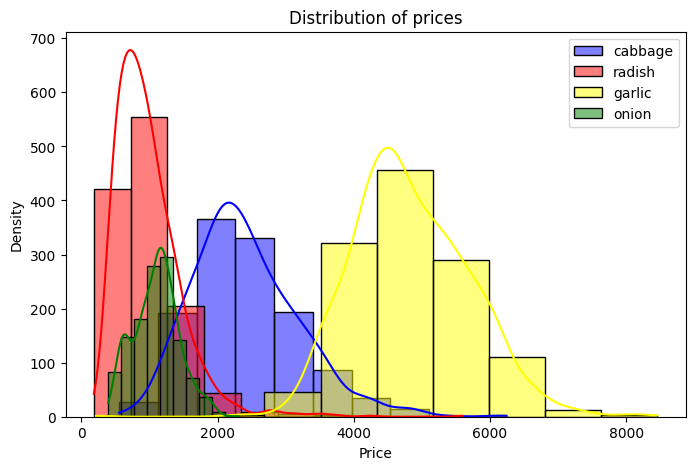

In [15]:
import seaborn as sns

plt.figure(figsize = (8, 5))

sns.histplot(train_data['cabbage'], bins = 10, kde = True, label = 'cabbage', color = 'blue', edgecolor = 'black')
sns.histplot(train_data['radish'], bins = 10, kde = True, label = 'radish', color = 'red', edgecolor = 'black')
sns.histplot(train_data['garlic'], bins = 10, kde = True, label = 'garlic', color = 'yellow', edgecolor = 'black')
sns.histplot(train_data['onion'], bins = 10, kde = True, label = 'onion', color = 'green', edgecolor = 'black')

plt.title('Distribution of prices', fontsize = 12)
plt.xlabel('Price', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.legend()
plt.show()

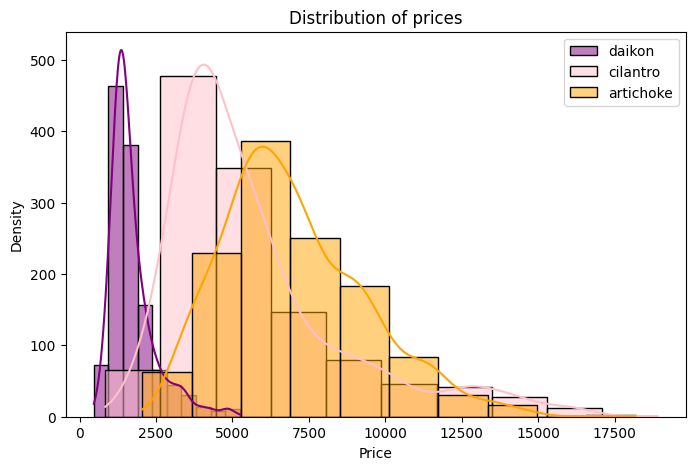

In [16]:
plt.figure(figsize = (8, 5))

sns.histplot(train_data['daikon'], bins = 10, kde = True, label = 'daikon', color = 'purple', edgecolor = 'black')
sns.histplot(train_data['cilantro'], bins = 10, kde = True, label = 'cilantro', color = 'pink', edgecolor = 'black')
sns.histplot(train_data['artichoke'], bins = 10, kde = True, label = 'artichoke', color = 'orange', edgecolor = 'black')

plt.title('Distribution of prices', fontsize = 12)
plt.xlabel('Price', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.legend()
plt.show()

In [17]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['day'] = train_data['date'].dt.day_of_week
train_data['month'] = train_data['date'].dt.month

price_by_day = train_data.groupby("day")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)
price_by_month = train_data.groupby("month")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)

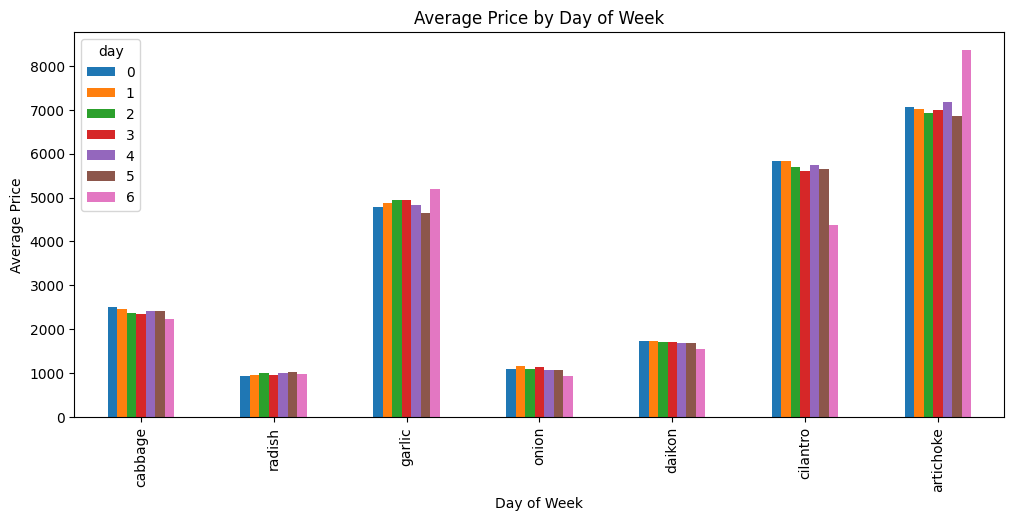

In [18]:
price_by_day.T.plot(kind = 'bar', figsize = (12, 5))
plt.title('Average Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Price')
plt.show()

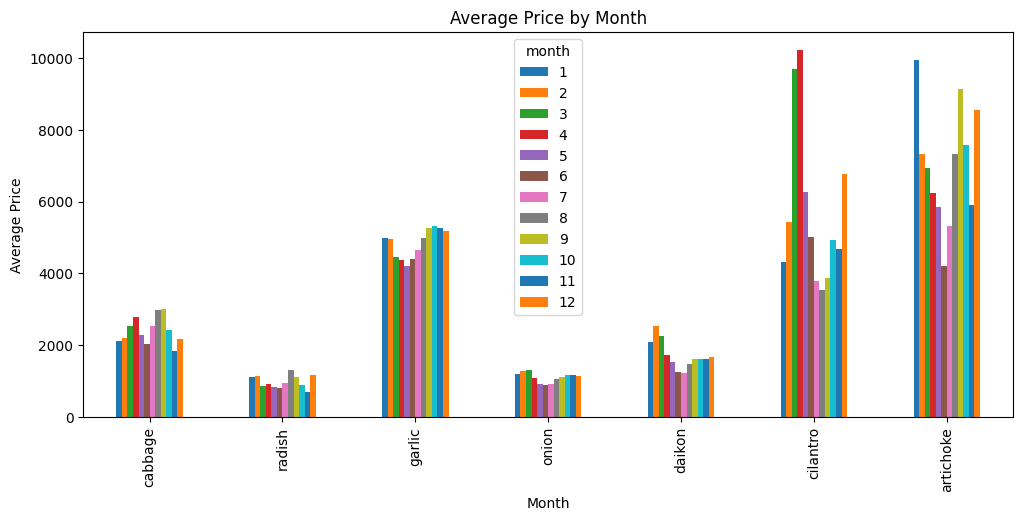

In [19]:
price_by_month.T.plot(kind = 'bar', figsize = (12, 5))

plt.title("Average Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.show()

In [20]:
# Day, Month는 무시

cor_matrix_train = train_data.corr()[1:].drop('date', axis = 1)
cor_matrix_train.style.background_gradient(cmap = 'coolwarm')

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,day,month
cabbage,1.000000,0.339659,-0.085639,0.053447,-0.050555,0.127825,0.259864,-0.036280,-0.000250
radish,0.339659,1.000000,-0.006457,0.200517,0.101324,0.080207,0.339039,0.053851,-0.007680
garlic,-0.085639,-0.006457,1.000000,-0.041142,-0.154355,-0.253576,0.221336,-0.033893,0.253794
onion,0.053447,0.200517,-0.041142,1.000000,0.559508,0.327882,0.151178,-0.051554,-0.064181
daikon,-0.050555,0.101324,-0.154355,0.559508,1.000000,0.107274,0.126964,-0.026526,-0.276781
cilantro,0.127825,0.080207,-0.253576,0.327882,0.107274,1.000000,-0.037530,-0.027409,-0.225754
artichoke,0.259864,0.339039,0.221336,0.151178,0.126964,-0.037530,1.000000,-0.000330,-0.015774
day,-0.036280,0.053851,-0.033893,-0.051554,-0.026526,-0.027409,-0.000330,1.000000,0.001071
month,-0.000250,-0.007680,0.253794,-0.064181,-0.276781,-0.225754,-0.015774,0.001071,1.000000


In [21]:
cor_matrix_test = test_data.corr()[1:].drop('date', axis = 1)
cor_matrix_test.style.background_gradient(cmap = 'coolwarm')

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
cabbage,1.000000,-0.278165,0.623558,0.639435,0.000395,-0.142507,-0.376568
radish,-0.278165,1.000000,-0.253296,-0.558643,0.653552,0.167720,0.414988
garlic,0.623558,-0.253296,1.000000,0.796549,-0.234232,-0.369206,-0.459214
onion,0.639435,-0.558643,0.796549,1.000000,-0.401880,-0.543998,-0.426292
daikon,0.000395,0.653552,-0.234232,-0.401880,1.000000,-0.120282,0.682805
cilantro,-0.142507,0.167720,-0.369206,-0.543998,-0.120282,1.000000,-0.393984
artichoke,-0.376568,0.414988,-0.459214,-0.426292,0.682805,-0.393984,1.000000
